In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_imdb = pd.read_csv('output_data\imdb_encoded.csv', index_col=0)
df_imdb.head(3)

,primaryTitle,imdbId,age,youth_rate,averageRating,numVotes,popularity_rate,Action,Adult,Adventure,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Carmencita,1,130.0,0.127389,5.7,2070,0.000706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Le clown et ses chiens,2,132.0,0.114650,5.6,279,0.000094,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Pauvre Pierrot,3,132.0,0.114650,6.5,2057,0.000701,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_link = pd.read_csv('input_data\link.csv')
df_link.drop(['tmdbId'], axis=1, inplace=True)
df_link.head(3)

,movieId,imdbId
0,1,114709
1,2,113497
2,3,113228


In [4]:
print("Nombre de films dans imdb: ", len(df_imdb))
print("Nombre de films dans MovieLens: ", len(df_link))
print("Différence entre les deux : ", len(df_imdb) - len(df_link))


Nombre de films dans imdb:  1468825
Nombre de films dans MovieLens:  27278
Différence entre les deux :  1441547


In [5]:
df_imdb_link = pd.merge(left=df_imdb, right=df_link, how='inner', on='imdbId', )
df_imdb_link = df_imdb_link.reset_index(drop=True)
df_imdb_link.head(3)

,primaryTitle,imdbId,age,youth_rate,averageRating,numVotes,popularity_rate,Action,Adult,Adventure,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,movieId
0,Blacksmith Scene,5,131.0,0.121019,6.2,2804,0.000956,0,0,0,...,0,0,0,1,0,0,0,0,0,95541
1,Edison Kinetoscopic Record of a Sneeze,8,130.0,0.127389,5.4,2217,0.000756,0,0,0,...,0,0,0,1,0,0,0,0,0,88674
2,Leaving the Factory,10,129.0,0.133758,6.8,7647,0.002611,0,0,0,...,0,0,0,1,0,0,0,0,0,120869


In [6]:
print("Nombre de films dans MovieLens: ", len(df_link))
print("Nombre de films dans Merged: ", len(df_imdb_link))

Nombre de films dans MovieLens:  27278
Nombre de films dans Merged:  27212


In [7]:
print(df_imdb_link.columns)

Index(['primaryTitle', 'imdbId', 'age', 'youth_rate', 'averageRating',
       'numVotes', 'popularity_rate', 'Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western',
       'movieId'],
      dtype='object')


In [8]:
columns_order = ['primaryTitle', 'imdbId', 'movieId', 'averageRating', 'youth_rate', 
       'popularity_rate', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']

df = df_imdb_link[columns_order]
df.head(3)

,primaryTitle,imdbId,movieId,averageRating,youth_rate,popularity_rate,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Blacksmith Scene,5,95541,6.2,0.121019,0.000956,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Edison Kinetoscopic Record of a Sneeze,8,88674,5.4,0.127389,0.000756,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Leaving the Factory,10,120869,6.8,0.133758,0.002611,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
df.dtypes

primaryTitle        object
imdbId               int64
movieId              int64
averageRating      float64
youth_rate         float64
popularity_rate    float64
Action               int64
Adult                int64
Adventure            int64
Animation            int64
Biography            int64
Comedy               int64
Crime                int64
Documentary          int64
Drama                int64
Family               int64
Fantasy              int64
Film-Noir            int64
Game-Show            int64
History              int64
Horror               int64
Music                int64
Musical              int64
Mystery              int64
News                 int64
Reality-TV           int64
Romance              int64
Sci-Fi               int64
Short                int64
Sport                int64
Talk-Show            int64
Thriller             int64
War                  int64
Western              int64
dtype: object

In [88]:
# Convertir toutes les colonnes int64 en int32 et float64 en float32
df = df.apply(lambda col: col.astype(np.int32) if col.dtype == np.int64 else 
                    (col.astype(np.float32) if col.dtype == np.float64 else col))

df['imdbId'] = df['imdbId'].astype(str)
df['movieId'] = df['movieId'].astype(str)

In [15]:
df.dtypes

primaryTitle        object
imdbId              object
movieId             object
averageRating      float32
youth_rate         float32
popularity_rate    float32
Action               int32
Adult                int32
Adventure            int32
Animation            int32
Biography            int32
Comedy               int32
Crime                int32
Documentary          int32
Drama                int32
Family               int32
Fantasy              int32
Film-Noir            int32
Game-Show            int32
History              int32
Horror               int32
Music                int32
Musical              int32
Mystery              int32
News                 int32
Reality-TV           int32
Romance              int32
Sci-Fi               int32
Short                int32
Sport                int32
Talk-Show            int32
Thriller             int32
War                  int32
Western              int32
dtype: object

In [16]:
df.shape

(27212, 34)

In [87]:
df.tail(3)

,primaryTitle,imdbId,movieId,averageRating,youth_rate,popularity_rate,Action,Adventure,Animation,Biography,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
27209,Polskie gówno,4438688,128734,-1.412515,0.891720,0.000102,0.000000,0.0,0.0,0.0,...,0.0,0.00173,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
27210,Power Rangers,4475970,130842,1.187485,0.898089,0.001275,0.000255,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.000733,0.002488,0.0,0.0,0.0,0.0
27211,Aziz Ansari Live in Madison Square Garden,4530184,131017,0.187485,0.898089,0.001150,0.000000,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [79]:
# Initialiser un dictionnaire vide
dict_column = {}

# Itérer sur les colonnes de type 'int' du DataFrame
for i in df.select_dtypes(include=['int']):
    # Calculer la somme des valeurs pour chaque colonne
    value = df[i].sum()
    # Utiliser le nom de la colonne comme clé et la somme comme valeur
    dict_column[i] = value

# Convertir le dictionnaire en DataFrame
freq_genres = pd.DataFrame(list(dict_column.items()), columns=['Column', 'Sum'])
freq_genres = freq_genres.sort_values('Sum', ascending=False, ignore_index=True)
# Afficher le DataFramef
freq_genres

,Column,Sum
0,Drama,14837
1,Comedy,9239
2,Romance,4807
3,Crime,4266
4,Action,3929
5,Adventure,3096
6,Thriller,3073
7,Horror,2680
8,Documentary,2467
9,Mystery,1971


In [78]:
df.drop(['News', 'Adult', 'Reality-TV', 'Talk-Show', 'Game-Show'], axis=1, inplace=True)

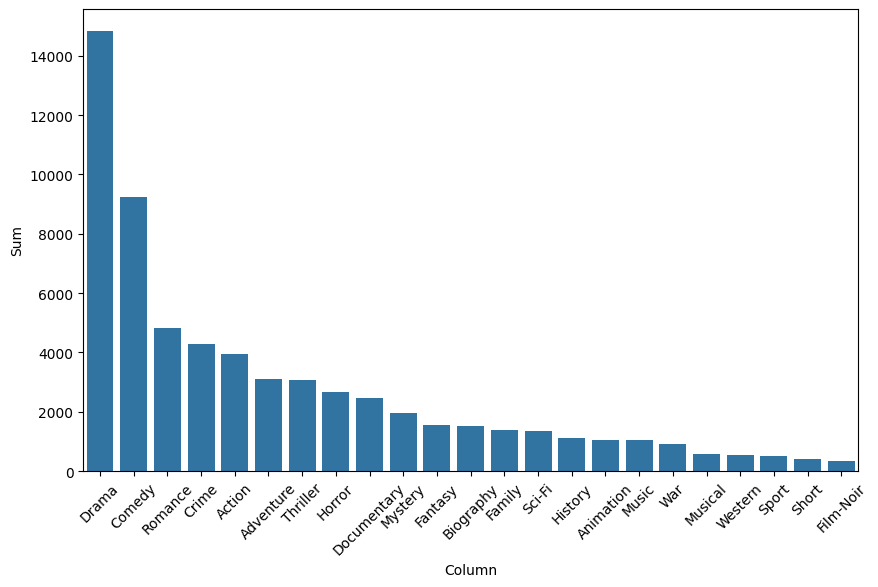

In [80]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(x='Column',y='Sum',data=freq_genres)
plt.xticks(rotation=45)
plt.show()

In [86]:
for i in df.select_dtypes(include=['int']):
    # Calculer la somme des valeurs pour chaque colonne (fréquence du genre)
    freq = df[i].sum()
    
    # Appliquer la pondération inverse
    df[i] = df[i].apply(lambda x: 1/freq if x == 1 else 0)



df['averageRating'] = (df['averageRating'] - df['averageRating'].mean() / df['averageRating'].std())
df.tail(3)


,primaryTitle,imdbId,movieId,averageRating,youth_rate,popularity_rate,Action,Adventure,Animation,Biography,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
27209,Polskie gówno,4438688,128734,-1.412515,0.891720,0.000102,0.000000,0.0,0.0,0.0,...,0.0,0.00173,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
27210,Power Rangers,4475970,130842,1.187485,0.898089,0.001275,0.000255,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.000733,0.002488,0.0,0.0,0.0,0.0
27211,Aziz Ansari Live in Madison Square Garden,4530184,131017,0.187485,0.898089,0.001150,0.000000,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [89]:
df.dtypes

primaryTitle        object
imdbId              object
movieId             object
averageRating      float32
youth_rate         float32
popularity_rate    float32
Action             float32
Adventure          float32
Animation          float32
Biography          float32
Comedy             float32
Crime              float32
Documentary        float32
Drama              float32
Family             float32
Fantasy            float32
Film-Noir          float32
History            float32
Horror             float32
Music              float32
Musical            float32
Mystery            float32
Romance            float32
Sci-Fi             float32
Short              float32
Sport              float32
Thriller           float32
War                float32
Western            float32
dtype: object

In [90]:
# Export du dataframe au format csv
df.to_csv('output_data/df_encoded.csv', index=True)